# Introduction

In [1]:
# this project is about a basic neural network implementation made by Martin Takács

# Fashion Item Classification
# with utilization of the fashion-MNIST dataset

In [2]:
# the goal of the neural network would be to properly tell what category does a clothing belongs to
# based on the input image

In [3]:
# the fashion-MNIST dataset

# images:
# - grayscale
# - 28 x 28 pixel
# - 60 000 train image
# - 10 000 test image
# - 10 category
#  - T-shirt
#  - Trouser
#  - Pullover
#  - Dress
#  - Coat
#  - Sandal
#  - Shirt
#  - Sneaker
#  - Bag
#  - Ankle bott

# SECTION 1: IMPORT LIBRARIES & SETUP

In [4]:
# Core PyTorch library - the main framework for building neural networks
import torch
import torch.nn as nn  # nn = neural network building blocks
import torch.optim as optim  # Optimization algorithms (the "teacher" that corrects mistakes)


# For loading datasets and transforming images
import torchvision
import torchvision.transforms as transforms

# For visualizing our data and results
import matplotlib.pyplot as plt

# For numerical operations
import numpy as np

In [5]:
# Check if we're using CPU or GPU (in your case, it'll be CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Set random seed for reproducibility (so results are consistent each time)
torch.manual_seed(42)
np.random.seed(42)

print("✅ All libraries imported successfully!")
print(f"PyTorch version: {torch.__version__}")

Using device: cpu
✅ All libraries imported successfully!
PyTorch version: 2.9.0+cu128


# SECTION 2: LOAD & EXPLORE DATA (EDA)

In [6]:
print("=" * 50)
print("EXPLORATORY DATA ANALYSIS (EDA)")
print("=" * 50)

# Download the dataset WITHOUT any transformations first
# We only convert to tensor (no normalization yet) so we can see raw pixel values
raw_transform = transforms.Compose([
    transforms.ToTensor()  # Just convert to tensor, keep original 0-1 range
])

# Load datasets
# train dataset
train_dataset_raw = torchvision.datasets.FashionMNIST(
    root='../data', 
    train=True, 
    download=True, 
    transform=raw_transform
)
# test dataset
test_dataset_raw = torchvision.datasets.FashionMNIST(
    root='../data', 
    train=False, 
    download=True, 
    transform=raw_transform
)

print("✅ Dataset downloaded successfully!")
print(f"{train_dataset_raw.data.shape}")
print(f"{test_dataset_raw.data.shape}")

EXPLORATORY DATA ANALYSIS (EDA)
✅ Dataset downloaded successfully!
torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [7]:
# BASIC INFORMATION

# What we're checking:
# - How many images do we have?
# - What size are the images? (28×28 pixels)
# - What format is the data in? (tensors)
# - How many categories? (10 clothing types)

# Label = shows the real type and value of the data
# (in the dataset as how they are stored - not like this is an image or an ankle boot)

# Label Number  →  Clothing Type
# ─────────────────────────────
# 0             →  T-shirt/top
# 1             →  Trouser
# 2             →  Pullover
# 3             →  Dress
# 4             →  Coat
# 5             →  Sandal
# 6             →  Shirt
# 7             →  Sneaker
# 8             →  Bag
# 9             →  Ankle boot

print("\n📊 DATASET OVERVIEW:")
print("-" * 50)
print(f"Training samples: {len(train_dataset_raw):,}")
print(f"Test samples: {len(test_dataset_raw):,}")
print(f"Total samples: {len(train_dataset_raw) + len(test_dataset_raw):,}")

# Get one sample to inspect
sample_image, sample_label = train_dataset_raw[0]
print(f"\nImage shape: {sample_image.shape}")  # Should be [1, 28, 28]
print(f"Image data type: {sample_image.dtype}")
print(f"Label type: {type(sample_label)}")
print(f"Label value: {sample_label}")

# Class names
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(f"\nNumber of classes: {len(classes)}")
print(f"Class names: {classes}")

# Results show that we have a total of 70 000 images to work with.
# The images one by one are only 2D with the channel of grayscale hence the dimensions [1, 28, 28],
# which translates to 28 by 28 pixel size by each individual image.
# There are 10 categories corresponding with the dataset indices of labels.


📊 DATASET OVERVIEW:
--------------------------------------------------
Training samples: 60,000
Test samples: 10,000
Total samples: 70,000

Image shape: torch.Size([1, 28, 28])
Image data type: torch.float32
Label type: <class 'int'>
Label value: 9

Number of classes: 10
Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



🖼️  SAMPLE IMAGES FROM EACH CLASS:


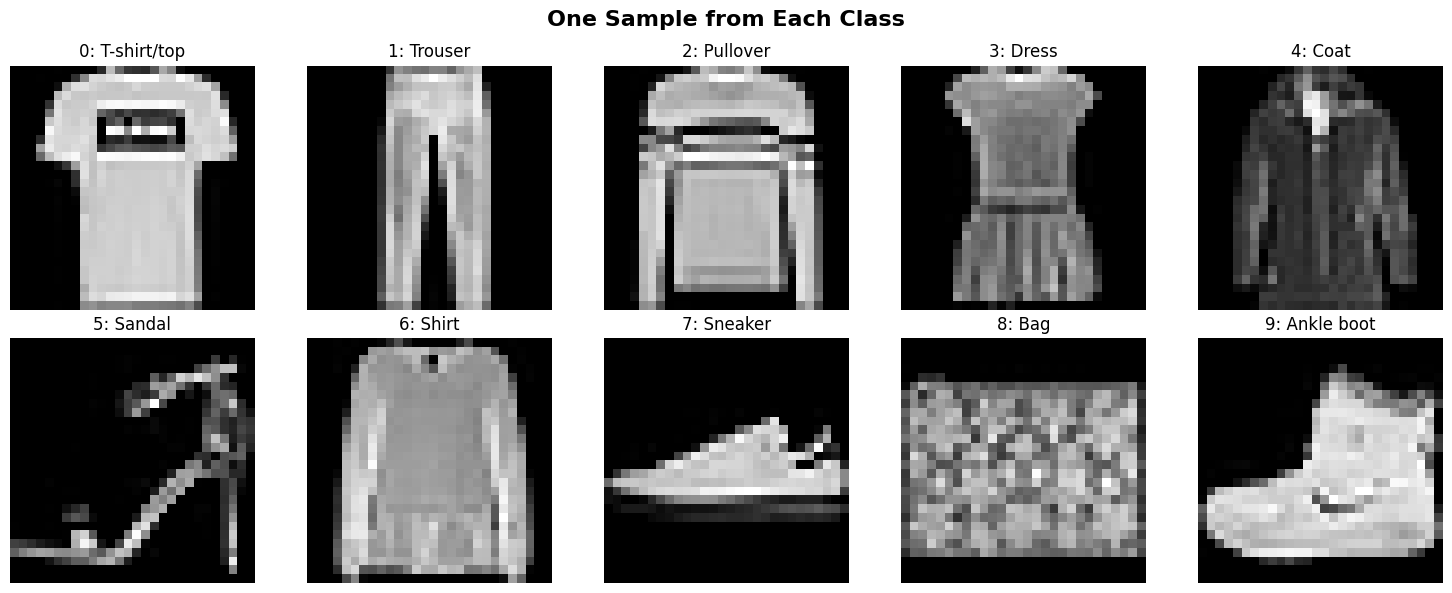

In [8]:
# VISUALIZE SAMPLES FOR REASSURANCE

# What we're checking:
# - What does each clothing type actually look like?
# - Are the images clear enough?
# - Do the labels make sense?


# Let's look at random samples from each class
print("\n🖼️  SAMPLE IMAGES FROM EACH CLASS:")

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('One Sample from Each Class', fontsize=16, fontweight='bold')

for idx, class_name in enumerate(classes):
    # Find first image of this class
    for i in range(len(train_dataset_raw)):
        img, label = train_dataset_raw[i]
        if label == idx:
            # Plot it
            row = idx // 5
            col = idx % 5
            axes[row, col].imshow(img.squeeze(), cmap='gray')
            axes[row, col].set_title(f'{idx}: {class_name}')
            axes[row, col].axis('off')
            break

plt.tight_layout()
plt.show()

# Result show all the images are greyscaled and based on black background and the labels make sense.
# As for the image quality in my opinion it is totally okay as we can tell them apart and define what
# we are seeing (no ambiguity).


📈 CLASS DISTRIBUTION ANALYSIS:

Training Set Distribution:
--------------------------------------------------
Class           Name            Count      Percentage
--------------------------------------------------
0               T-shirt/top     6000       10.0%
1               Trouser         6000       10.0%
2               Pullover        6000       10.0%
3               Dress           6000       10.0%
4               Coat            6000       10.0%
5               Sandal          6000       10.0%
6               Shirt           6000       10.0%
7               Sneaker         6000       10.0%
8               Bag             6000       10.0%
9               Ankle boot      6000       10.0%

Test Set Distribution:
--------------------------------------------------
Class           Name            Count      Percentage
--------------------------------------------------
0               T-shirt/top     1000       10.0%
1               Trouser         1000       10.0%
2               

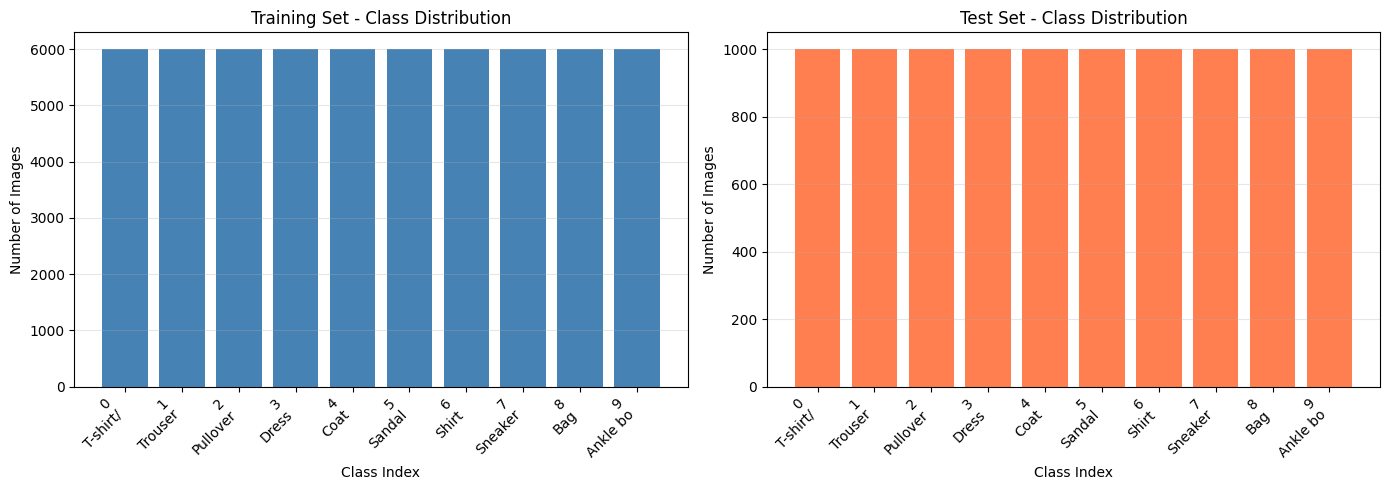

In [9]:
# CLASS DISTRIBUTION FOR BALANCE CHECK

# What we're checking:
# - Are all classes equally represented? (balanced dataset?)
# - If one class has way more examples, the model might be biased towards it
# - Fashion-MNIST is balanced (6000 per class in training), but good to verify!

print("\n📈 CLASS DISTRIBUTION ANALYSIS:")

# Count how many images per class
train_labels = [label for _, label in train_dataset_raw]
test_labels = [label for _, label in test_dataset_raw]

# Count occurrences
from collections import Counter

train_counts = Counter(train_labels)
test_counts = Counter(test_labels)

# Print table
print("\nTraining Set Distribution:")
print("-" * 50)
print(f"{'Class':<15} {'Name':<15} {'Count':<10} {'Percentage':<10}")
print("-" * 50)
for class_idx in range(10):
    count = train_counts[class_idx]
    percentage = (count / len(train_dataset_raw)) * 100
    print(f"{class_idx:<15} {classes[class_idx]:<15} {count:<10} {percentage:.1f}%")

print("\nTest Set Distribution:")
print("-" * 50)
print(f"{'Class':<15} {'Name':<15} {'Count':<10} {'Percentage':<10}")
print("-" * 50)
for class_idx in range(10):
    count = test_counts[class_idx]
    percentage = (count / len(test_dataset_raw)) * 100
    print(f"{class_idx:<15} {classes[class_idx]:<15} {count:<10} {percentage:.1f}%")

# Visualize distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Training distribution
ax1.bar(range(10), [train_counts[i] for i in range(10)], color='steelblue')
ax1.set_xlabel('Class Index')
ax1.set_ylabel('Number of Images')
ax1.set_title('Training Set - Class Distribution')
ax1.set_xticks(range(10))
ax1.set_xticklabels([f'{i}\n{classes[i][:8]}' for i in range(10)], rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Test distribution
ax2.bar(range(10), [test_counts[i] for i in range(10)], color='coral')
ax2.set_xlabel('Class Index')
ax2.set_ylabel('Number of Images')
ax2.set_title('Test Set - Class Distribution')
ax2.set_xticks(range(10))
ax2.set_xticklabels([f'{i}\n{classes[i][:8]}' for i in range(10)], rotation=45, ha='right')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Results show we are good as there is not a single problem with the distribution of the data
# (nothing missing or lacking in amount for all the labels, no possible bias towards any class - same values). 

In [10]:
# VERIFY IMAGE CONSISTENCY

# What we're checking:
# - Are all images the same size? (important for neural networks!)
# - Grayscale (1 channel) or color (3 channels)?

print("\n✅ IMAGE CONSISTENCY CHECK:")

# Check if all images have the same dimensions
all_same = True
expected_shape = (1, 28, 28)

for i in range(min(100, len(train_dataset_raw))):  # Check first 100
    img, _ = train_dataset_raw[i]
    if img.shape != expected_shape:
        print(f"❌ Image {i} has unexpected shape: {img.shape}")
        all_same = False
        break

if all_same:
    print(f"✅ All images have consistent shape: {expected_shape}")
    print(f"   - Channels: {expected_shape[0]}")
    print(f"   - Height: {expected_shape[1]} pixels")
    print(f"   - Width: {expected_shape[2]} pixels")
    print(f"   - Total pixels per image: {28*28} should equal to 784")


✅ IMAGE CONSISTENCY CHECK:
✅ All images have consistent shape: (1, 28, 28)
   - Channels: 1
   - Height: 28 pixels
   - Width: 28 pixels
   - Total pixels per image: 784 should equal to 784



🔢 PIXEL VALUE STATISTICS:

Analyzed 1000 random images
Total pixels analyzed: 784,000
Supposed amount of analysed pixels: 784000

Analyzed 1000 random images
Total pixels analyzed: 784,000
Supposed amount of analysed pixels: 784000
Min pixel value: 0.0000
Max pixel value: 1.0000
Mean pixel value: 0.2826
Std deviation: 0.3523
Median: 0.0000
Min pixel value: 0.0000
Max pixel value: 1.0000
Mean pixel value: 0.2826
Std deviation: 0.3523
Median: 0.0000


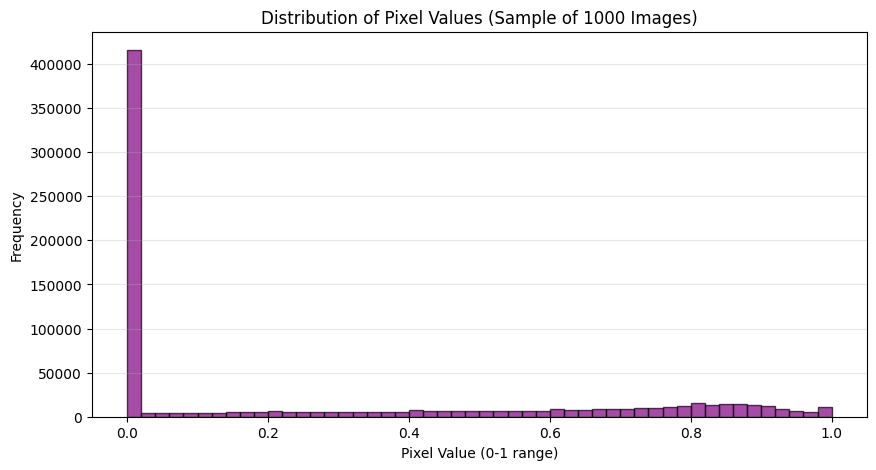

In [11]:
# PIXEL VALUE ANALYSIS

# What we're checking:
# - What range are pixel values in? (0-1 range)
# - What's the average brightness?
# - Are most pixels dark or light?
# - This tells us HOW to normalize in the next section!

print("\n🔢 PIXEL VALUE STATISTICS:")

# Sample 1000 random images to analyze
sample_size = 1000
sample_indices = np.random.choice(len(train_dataset_raw), sample_size, replace=False)

pixel_values = []
for idx in sample_indices:
    img, _ = train_dataset_raw[idx]
    pixel_values.extend(img.flatten().numpy()) # flatten?

pixel_values = np.array(pixel_values)

print(f"\nAnalyzed {sample_size} random images")
print(f"Total pixels analyzed: {len(pixel_values):,}")
print(f"Supposed amount of analysed pixels: {1000*(28*28)}") # intentionally hard-coded
print(f"Min pixel value: {pixel_values.min():.4f}")
print(f"Max pixel value: {pixel_values.max():.4f}")
print(f"Mean pixel value: {pixel_values.mean():.4f}")
print(f"Std deviation: {pixel_values.std():.4f}")
print(f"Median: {np.median(pixel_values):.4f}")

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(pixel_values, bins=50, color='purple', alpha=0.7, edgecolor='black')
plt.xlabel('Pixel Value (0-1 range)')
plt.ylabel('Frequency')
plt.title('Distribution of Pixel Values (Sample of 1000 Images)')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Results show most pixel values are close to 0 - logical cause we have grayscale images with based black background.
# The correct amount of analyzed pixels should be counted by the following mathematical logic:
# We get a 1000 image and each image is a 28 by 28 pixel thus amount_of_images * (each_individual_image_total_pixel_size)
# The average pixel brightness is the "Mean pixel value".

In [12]:
# EDA SUMMARY

print("\n" + "=" * 50)
print("EDA SUMMARY")
print("=" * 50)
print(f"Training samples: {len(train_dataset_raw):,}")
print(f"Test samples: {len(test_dataset_raw):,}")
print(f"Total samples: {len(train_dataset_raw) + len(test_dataset_raw):,}")
print(f"✅ All images have consistent shape: {expected_shape}")
print(f"   - Channels: {expected_shape[0]}")
print(f"   - Height: {expected_shape[1]} pixels")
print(f"   - Width: {expected_shape[2]} pixels")
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(f"Number of classes: {len(classes)}")
print(f"Class names: {classes}")


EDA SUMMARY
Training samples: 60,000
Test samples: 10,000
Total samples: 70,000
✅ All images have consistent shape: (1, 28, 28)
   - Channels: 1
   - Height: 28 pixels
   - Width: 28 pixels
Number of classes: 10
Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# SECTION 3: DECISION MAKING

In [13]:
# 🎓 NORMALIZATION DECISION

"""
CRITICAL ANALYSIS - NORMALIZATION STRATEGY
==========================================

📊 FINDINGS FROM EDA:
   • Mean pixel value: 0.2913
   • Std deviation: 0.3552
   • Median: 0.0039
   • Distribution: Heavily skewed toward 0 (black background dominates)

🤔 QUESTION: 
   Should we normalize this dataset? If yes, what parameters should we use?

💡 ANALYSIS:
   Fashion-MNIST has a unique characteristic - most pixels are near zero due to
   black backgrounds. The actual clothing information is concentrated in higher
   pixel values (0.5-1.0 range).

   Three normalization approaches were considered:

   1. STANDARD NORMALIZATION: Normalize(mean=0.5, std=0.5)
      • Most common in tutorials/literature
      • Centers data around 0 with range ≈ [-1, 1]
      • Pro: Convention, widely tested
      • Con: Doesn't match our actual data distribution (mean=0.29, not 0.5)

   2. NO NORMALIZATION: Just ToTensor() → [0, 1] range
      • Keeps original distribution
      • Pro: Simpler, more intuitive
      • Con: Slightly slower convergence in practice

   3. CUSTOM NORMALIZATION: Normalize(mean=0.2913, std=0.3552)
      • Uses actual statistics from our EDA
      • Pro: Most statistically correct for THIS dataset
      • Pro: Centers data properly around true mean (→ 0)
      • Con: Less common, requires EDA to determine

🔬 EXPERIMENT:
   To make a decision, let's train TWO models:
   • Model A: Standard normalization (0.5, 0.5)
   • Model B: Custom normalization (0.2913, 0.3552)
   
   We'll compare:
   • Training speed (loss convergence)
   • Final accuracy
   • Training stability

📈 HYPOTHESIS:
   Custom normalization should perform slightly better as it properly centers
   our specific data distribution.

Author: originalmartin97 (used AI)
Date: 2025-11-12
"""

print("=" * 60)
print("🔬 NORMALIZATION EXPERIMENT SETUP")
print("=" * 60)
print("\nWe will train and compare two models:")
print("\n📊 MODEL A - Standard Normalization")
print("   • Transform: Normalize(mean=0.5, std=0.5)")
print("   • Reasoning: Industry standard approach")
print("\n📊 MODEL B - Custom Normalization")
print("   • Transform: Normalize(mean=0.2913, std=0.3552)")
print("   • Reasoning: Matches actual data distribution from EDA")

🔬 NORMALIZATION EXPERIMENT SETUP

We will train and compare two models:

📊 MODEL A - Standard Normalization
   • Transform: Normalize(mean=0.5, std=0.5)
   • Reasoning: Industry standard approach

📊 MODEL B - Custom Normalization
   • Transform: Normalize(mean=0.2913, std=0.3552)
   • Reasoning: Matches actual data distribution from EDA


In [14]:
"""
⚠️  IMPORTANT CLARIFICATION:

"Centering" means making the mean = 0 after normalization.

• STANDARD NORMALIZE(0.5, 0.5):
  - Assumes data mean is 0.5
  - Our actual mean is 0.2913
  - Result: Data centers at -0.417 (NOT zero!)
  - Formula: (0.2913 - 0.5) / 0.5 = -0.417

• CUSTOM NORMALIZE(0.2913, 0.3552):
  - Uses our actual mean and std from EDA
  - Result: Data centers at exactly 0 ✓
  - Formula: (0.2913 - 0.2913) / 0.3552 = 0

This is why custom normalization is more mathematically correct
for our specific dataset!
"""
print("")

# SECTION 4: DATA PREPROCESSING

In [15]:
# DATA PREPROCESSING (EXPERIMENTAL SETUP)

print("\n" + "=" * 60)
print("SECTION 4: DATA PREPROCESSING - DUAL APPROACH")
print("=" * 60)

# Define BOTH transformation pipelines

# Transform A: Standard Normalization (0.5, 0.5)
transform_standard = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Transform B: Custom Normalization (actual EDA statistics)
transform_custom = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.2913,), (0.3552,))
])

print("\n✅ Two transformation pipelines created:")
print("\n1️⃣  STANDARD TRANSFORM:")
print("    • ToTensor() → [0, 1]")
print("    • Normalize(mean=0.5, std=0.5) → ≈[-1, 1]")
print("    • Formula: (pixel - 0.5) / 0.5")

print("\n2️⃣  CUSTOM TRANSFORM:")
print("    • ToTensor() → [0, 1]")
print("    • Normalize(mean=0.2913, std=0.3552)")
print("    • Formula: (pixel - 0.2913) / 0.3552")
print("    • Centers data at true mean = 0")


SECTION 4: DATA PREPROCESSING - DUAL APPROACH

✅ Two transformation pipelines created:

1️⃣  STANDARD TRANSFORM:
    • ToTensor() → [0, 1]
    • Normalize(mean=0.5, std=0.5) → ≈[-1, 1]
    • Formula: (pixel - 0.5) / 0.5

2️⃣  CUSTOM TRANSFORM:
    • ToTensor() → [0, 1]
    • Normalize(mean=0.2913, std=0.3552)
    • Formula: (pixel - 0.2913) / 0.3552
    • Centers data at true mean = 0


In [16]:
# Dataset A: Standard Normalization

# Load dataset in
train_dataset_A = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform_standard
)

test_dataset_A = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform_standard
)

print(f"✅ Standard Normalized Dataset (dataset_A) loaded succesfully.")

✅ Standard Normalized Dataset (dataset_A) loaded succesfully.


In [17]:
# Dataset B: Custom Normalization

# Load dataset in
train_dataset_B = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform_custom
)

test_dataset_B = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform_custom
)

print(f"✅ Custom Normalized Dataset (dataset_B) loaded succesfully.")

✅ Custom Normalized Dataset (dataset_B) loaded succesfully.


In [18]:
# ===================================
# Create DataLoaders for BOTH datasets
# ===================================

batch_size = 64

# DataLoaders for Dataset A (Standard)
train_loader_A = torch.utils.data.DataLoader(
    dataset=train_dataset_A,
    batch_size=batch_size,
    shuffle=True,
    num_workers=0,
    pin_memory=False
)

test_loader_A = torch.utils.data.DataLoader(
    dataset=test_dataset_A,
    batch_size=batch_size,
    shuffle=False,
    num_workers=0,
    pin_memory=False
)

# DataLoaders for Dataset B (Custom)
train_loader_B = torch.utils.data.DataLoader(
    dataset=train_dataset_B,
    batch_size=batch_size,
    shuffle=True,
    num_workers=0,
    pin_memory=False
)

test_loader_B = torch.utils.data.DataLoader(
    dataset=test_dataset_B,
    batch_size=batch_size,
    shuffle=False,
    num_workers=0,
    pin_memory=False
)

print("\n" + "=" * 60)
print("✅ ALL DATALOADERS CREATED")
print("=" * 60)
print(f"\nBatch size: {batch_size}")
print(f"Training batches per dataset: {len(train_loader_A)}")
print(f"Test batches per dataset: {len(test_loader_A)}")
print(f"\n🔬 Ready to train both models for comparison!")


✅ ALL DATALOADERS CREATED

Batch size: 64
Training batches per dataset: 938
Test batches per dataset: 157

🔬 Ready to train both models for comparison!


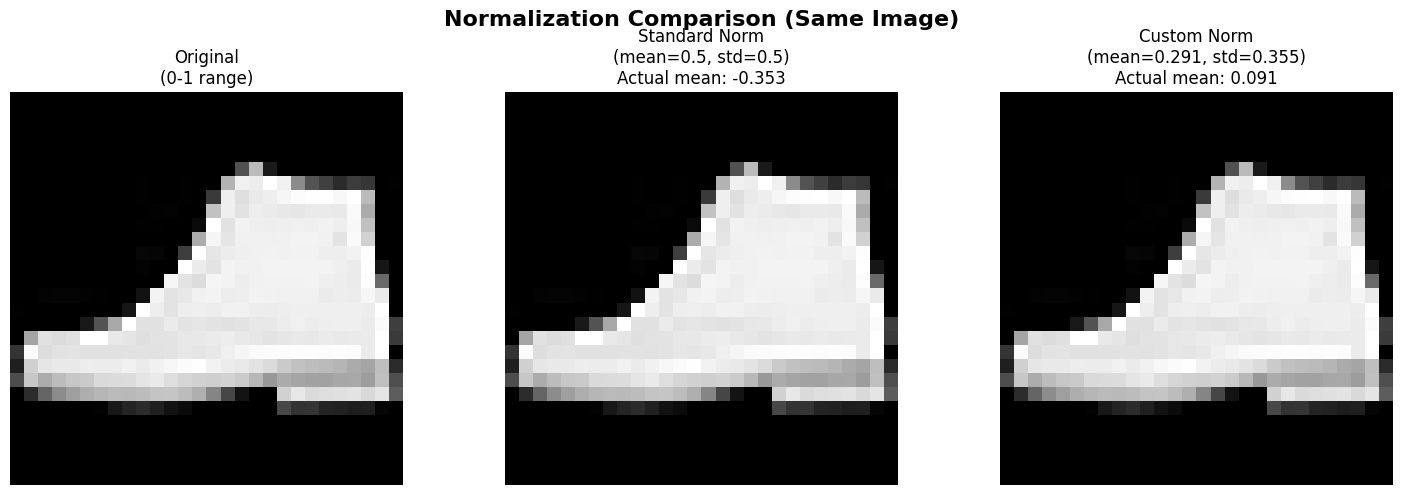


💡 Key Observation:
   Both images look identical visually (after denormalization),
   but the underlying pixel values are scaled differently.
   This affects how the neural network processes them!


In [19]:
# ===================================
# Visual Comparison of Both Normalizations
# ===================================

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Get same image from both datasets
img_A, label_A = train_dataset_A[42]  # Using index 42 for consistency
img_B, label_B = train_dataset_B[42]

# Denormalization functions
def denormalize_standard(img):
    return img * 0.5 + 0.5

def denormalize_custom(img):
    return img * 0.3552 + 0.2913

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Normalization Comparison (Same Image)', fontsize=16, fontweight='bold')

# Original (from raw dataset)
img_raw, _ = train_dataset_raw[42]
axes[0].imshow(img_raw.squeeze(), cmap='gray')
axes[0].set_title('Original\n(0-1 range)')
axes[0].axis('off')

# Standard normalized
axes[1].imshow(denormalize_standard(img_A).squeeze(), cmap='gray')
axes[1].set_title(f'Standard Norm\n(mean=0.5, std=0.5)\nActual mean: {img_A.mean().item():.3f}')
axes[1].axis('off')

# Custom normalized
axes[2].imshow(denormalize_custom(img_B).squeeze(), cmap='gray')
axes[2].set_title(f'Custom Norm\n(mean=0.291, std=0.355)\nActual mean: {img_B.mean().item():.3f}')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("\n💡 Key Observation:")
print("   Both images look identical visually (after denormalization),")
print("   but the underlying pixel values are scaled differently.")
print("   This affects how the neural network processes them!")

# SECTION 5: DA MODEL

In [20]:
# VERIFY DIMENSIONS WORK

def verify_dimensions():
    """
    Quick check that our transformations work correctly
    """
    # Test with Dataset A
    sample_img, sample_label = train_dataset_A[0]
    print(f"✓ Image tensor shape: {sample_img.shape}")
    print(f"✓ Image tensor min: {sample_img.min():.4f}")
    print(f"✓ Image tensor max: {sample_img.max():.4f}")
    print(f"✓ Label: {sample_label} ({classes[sample_label]})")

verify_dimensions()

✓ Image tensor shape: torch.Size([1, 28, 28])
✓ Image tensor min: -1.0000
✓ Image tensor max: 1.0000
✓ Label: 9 (Ankle boot)


In [21]:
# NEURAL NETWORK ARCHITECTURE

# Why 784 input neurons?
# - Each image is 28 × 28 pixels = 784 total pixels
# - Neural networks need 1D input (flat list)
# - We flatten the 2D image: [1, 28, 28] → [784]
# - Each pixel becomes one input value

# Architecture design:
# Input: 784 (flattened image)
# Hidden layers: We'll add some layers with activation functions
# Output: 10 (one for each clothing category)

class FashionNet(nn.Module):
    def __init__(self):
        super(FashionNet, self).__init__()
        
        # Layer 1: Input (784) → Hidden (128 neurons)
        self.fc1 = nn.Linear(784, 128)
        
        # Layer 2: Hidden (128) → Hidden (64 neurons)
        self.fc2 = nn.Linear(128, 64)
        
        # Layer 3: Hidden (64) → Output (10 classes)
        self.fc3 = nn.Linear(64, 10)
        
        # Activation function (ReLU - Rectified Linear Unit)
        # ReLU(x) = max(0, x) - simple and effective
        self.relu = nn.ReLU()
        
        # Dropout for regularization (prevents overfitting)
        # Randomly drops 20% of neurons during training
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        # Flatten the image: [batch, 1, 28, 28] → [batch, 784]
        x = x.view(-1, 28 * 28)
        
        # Layer 1: Linear → ReLU → Dropout
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        # Layer 2: Linear → ReLU → Dropout
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        # Layer 3: Linear (output layer - no activation here)
        # CrossEntropyLoss will apply softmax internally
        x = self.fc3(x)
        
        return x

print("✅ FashionNet architecture defined!")
print("\nNetwork structure:")
print("  Input: 784 neurons (28×28 flattened)")
print("  Hidden Layer 1: 128 neurons + ReLU + Dropout(0.2)")
print("  Hidden Layer 2: 64 neurons + ReLU + Dropout(0.2)")
print("  Output: 10 neurons (10 classes)")

✅ FashionNet architecture defined!

Network structure:
  Input: 784 neurons (28×28 flattened)
  Hidden Layer 1: 128 neurons + ReLU + Dropout(0.2)
  Hidden Layer 2: 64 neurons + ReLU + Dropout(0.2)
  Output: 10 neurons (10 classes)


In [22]:
# 🧠 UNDERSTANDING THE NEURAL NETWORK CLASS

"""
Let's break down what's happening step by step:

1. CLASS DEFINITION:
   class FashionNet(nn.Module):
   - We create a new class called FashionNet
   - It inherits from nn.Module (PyTorch's base neural network class)
   - Think of it as creating a custom neural network blueprint

2. __init__ METHOD (Constructor):
   def __init__(self):
   - This runs ONCE when we create the model
   - It's where we DEFINE all the layers (but don't use them yet)
   
3. super(FashionNet, self).__init__():
   - Calls the parent class (nn.Module) initialization
   - nn.Module has essential setup code (tracking layers, gradients, etc.)
   - We MUST do this before adding our own layers
   - Analogy: Inheriting a house foundation before adding your rooms

4. DEFINING LAYERS (in __init__):
   self.fc1 = nn.Linear(784, 128)
   - fc1 = "fully connected layer 1"
   - nn.Linear(input_size, output_size) creates a layer
   - Takes 784 inputs, produces 128 outputs
   - Internally: weights matrix [784×128] + bias vector [128]
   - Formula: output = input × weights + bias
   
   self.relu = nn.ReLU()
   - ReLU = Rectified Linear Unit
   - Activation function: ReLU(x) = max(0, x)
   - If x < 0, output = 0
   - If x ≥ 0, output = x
   - Adds non-linearity (helps learn complex patterns)
   
   self.dropout = nn.Dropout(0.2)
   - Randomly "turns off" 20% of neurons during training
   - Prevents overfitting (model memorizing training data)
   - Only active during training, disabled during testing

5. forward METHOD:
   def forward(self, x):
   - This is where the ACTUAL computation happens
   - Takes input x (a batch of images)
   - Passes it through all the layers we defined
   - Returns the final output (predictions)
   
   HOW DATA FLOWS:
   Input image [batch, 1, 28, 28]
        ↓
   x.view(-1, 28*28) → Flatten to [batch, 784]
        ↓
   fc1 → [batch, 128]
        ↓
   relu → [batch, 128] (but negative values become 0)
        ↓
   dropout → [batch, 128] (randomly zero out 20% of values)
        ↓
   fc2 → [batch, 64]
        ↓
   relu → [batch, 64]
        ↓
   dropout → [batch, 64]
        ↓
   fc3 → [batch, 10] (final predictions for 10 classes)

KEY CONCEPT:
- __init__ = DEFINE the layers (like buying building materials)
- forward = USE the layers (like actually building with the materials)
- When we call model(input), PyTorch automatically calls forward(input)
"""

print("📚 Explanation added! Read the docstring above for details.")
print("\n💡 Quick Summary:")
print("   __init__:  Defines what layers exist (setup)")
print("   forward:   Defines how data flows through layers (execution)")
print("   super():   Calls parent class setup (required for PyTorch)")

📚 Explanation added! Read the docstring above for details.

💡 Quick Summary:
   __init__:  Defines what layers exist (setup)
   forward:   Defines how data flows through layers (execution)
   super():   Calls parent class setup (required for PyTorch)


In [23]:
# CREATE MODEL INSTANCES

# We need TWO separate models - one for each normalization approach

# Model A: For standard normalized data
model_A = FashionNet().to(device)

# Model B: For custom normalized data
model_B = FashionNet().to(device)

print("=" * 60)
print("✅ TWO MODELS CREATED")
print("=" * 60)
print("\n🔷 Model A: Uses standard normalization data")
print("🔷 Model B: Uses custom normalization data")
print(f"\n📍 Both models running on: {device}")

# Quick check - count parameters
def count_parameters(model):
    """Count the number of trainable parameters in the model"""
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

params_A = count_parameters(model_A)
params_B = count_parameters(model_B)

print(f"\n📊 Model Parameters:")
print(f"   Model A: {params_A:,} trainable parameters")
print(f"   Model B: {params_B:,} trainable parameters")

# Both should be identical since they have the same architecture
assert params_A == params_B, "Models should have the same number of parameters!"
print(f"\n✅ Both models have identical architecture")

✅ TWO MODELS CREATED

🔷 Model A: Uses standard normalization data
🔷 Model B: Uses custom normalization data

📍 Both models running on: cpu

📊 Model Parameters:
   Model A: 109,386 trainable parameters
   Model B: 109,386 trainable parameters

✅ Both models have identical architecture


In [24]:
# SETUP LOSS FUNCTION AND OPTIMIZER

# Loss Function: CrossEntropyLoss
# - Perfect for multi-class classification (10 classes)
# - Combines softmax + negative log likelihood
# - Measures how far predictions are from actual labels

criterion = nn.CrossEntropyLoss()

# Optimizer: Adam (Adaptive Moment Estimation)
# - More advanced than basic SGD
# - Automatically adjusts learning rate for each parameter
# - Generally converges faster and more reliably
# - Learning rate (lr) = how big the update steps are

learning_rate = 0.001  # Common starting point

# Create optimizers for both models
optimizer_A = optim.Adam(model_A.parameters(), lr=learning_rate)
optimizer_B = optim.Adam(model_B.parameters(), lr=learning_rate)

print("\n" + "=" * 60)
print("✅ LOSS FUNCTION & OPTIMIZERS CONFIGURED")
print("=" * 60)
print(f"\n🎯 Loss Function: CrossEntropyLoss")
print(f"   - Suitable for: Multi-class classification")
print(f"   - Number of classes: 10")

print(f"\n⚙️  Optimizer: Adam")
print(f"   - Learning rate: {learning_rate}")
print(f"   - Optimizer A: For Model A (standard norm)")
print(f"   - Optimizer B: For Model B (custom norm)")

print("\n💡 What happens during training:")
print("   1. Forward pass: Model makes predictions")
print("   2. Loss calculation: How wrong were the predictions?")
print("   3. Backward pass: Calculate gradients")
print("   4. Optimizer step: Update weights to reduce loss")


✅ LOSS FUNCTION & OPTIMIZERS CONFIGURED

🎯 Loss Function: CrossEntropyLoss
   - Suitable for: Multi-class classification
   - Number of classes: 10

⚙️  Optimizer: Adam
   - Learning rate: 0.001
   - Optimizer A: For Model A (standard norm)
   - Optimizer B: For Model B (custom norm)

💡 What happens during training:
   1. Forward pass: Model makes predictions
   2. Loss calculation: How wrong were the predictions?
   3. Backward pass: Calculate gradients
   4. Optimizer step: Update weights to reduce loss


# SECTION 6: TRAINING

In [25]:
# TRAINING FUNCTION

def train_model(model, train_loader, lossfunction, optimizer, device):
    """
    Train the model for one epoch
    
    Args:
        model: The neural network
        train_loader: DataLoader with training data
        lossfunction: Loss function
        optimizer: Optimizer (updates weights)
        device: CPU or GPU
    
    Returns:
        avg_loss: Average loss for this epoch
        accuracy: Training accuracy (%)
    """
    model.train()  # Set model to training mode (enables dropout)
    
    running_loss = 0.0
    correct = 0
    total = 0
    
    # Loop through batches
    for batch_idx, (images, labels) in enumerate(train_loader):
        # Move data to device (CPU/GPU)
        images = images.to(device)
        labels = labels.to(device)
        
        # 1. FORWARD PASS: Make predictions
        outputs = model(images)
        
        # 2. CALCULATE LOSS: How wrong are we?
        loss = lossfunction(outputs, labels)
        
        # 3. BACKWARD PASS: Calculate gradients
        optimizer.zero_grad()  # Clear old gradients
        loss.backward()        # Compute new gradients
        
        # 4. UPDATE WEIGHTS: Take a step to reduce loss
        optimizer.step()
        
        # Track statistics
        running_loss += loss.item()
        
        # Get predictions (highest score = predicted class)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    # Calculate averages
    avg_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total
    
    return avg_loss, accuracy

print("✅ Training function defined!")
print("\n📝 What the training function does:")
print("   1. Sets model to training mode")
print("   2. Loops through all batches")
print("   3. For each batch:")
print("      - Forward pass (predictions)")
print("      - Calculate loss")
print("      - Backward pass (gradients)")
print("      - Update weights")
print("   4. Returns average loss and accuracy")

✅ Training function defined!

📝 What the training function does:
   1. Sets model to training mode
   2. Loops through all batches
   3. For each batch:
      - Forward pass (predictions)
      - Calculate loss
      - Backward pass (gradients)
      - Update weights
   4. Returns average loss and accuracy


In [26]:
# EVALUATION FUNCTION

def evaluate_model(model, test_loader, lossfunction, device):
    """
    Evaluate the model on test data
    
    Args:
        model: The neural network
        test_loader: DataLoader with test data
        lossfunction: Loss function
        device: CPU or GPU
    
    Returns:
        avg_loss: Average loss on test data
        accuracy: Test accuracy (%)
    """
    model.eval()  # Set model to evaluation mode (disables dropout)
    
    running_loss = 0.0
    correct = 0
    total = 0
    
    # No gradient calculation needed for evaluation (saves memory)
    with torch.no_grad():
        for images, labels in test_loader:
            # Move data to device
            images = images.to(device)
            labels = labels.to(device)
            
            # Forward pass only
            outputs = model(images)
            loss = lossfunction(outputs, labels)
            
            # Track statistics
            running_loss += loss.item()
            
            # Get predictions
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    # Calculate averages
    avg_loss = running_loss / len(test_loader)
    accuracy = 100 * correct / total
    
    return avg_loss, accuracy

print("✅ Evaluation function defined!")
print("\n📝 What the evaluation function does:")
print("   1. Sets model to evaluation mode (no dropout)")
print("   2. Disables gradient calculation (faster, less memory)")
print("   3. Loops through test batches")
print("   4. Only does forward pass (no training)")
print("   5. Returns average loss and accuracy")

✅ Evaluation function defined!

📝 What the evaluation function does:
   1. Sets model to evaluation mode (no dropout)
   2. Disables gradient calculation (faster, less memory)
   3. Loops through test batches
   4. Only does forward pass (no training)
   5. Returns average loss and accuracy


In [27]:
# MAIN TRAINING LOOP - MODEL A (Standard Normalization)

print("\n" + "=" * 70)
print("🚀 TRAINING MODEL A (STANDARD NORMALIZATION)")
print("=" * 70)

# Training configuration
num_epochs = 10  # How many times to go through the entire dataset

# Storage for tracking progress
train_losses_A = []
train_accuracies_A = []
test_losses_A = []
test_accuracies_A = []

# Training loop
for epoch in range(num_epochs):
    # Train for one epoch
    train_loss, train_acc = train_model(model_A, train_loader_A, criterion, optimizer_A, device)
    
    # Evaluate on test set
    test_loss, test_acc = evaluate_model(model_A, test_loader_A, criterion, device)
    
    # Store results
    train_losses_A.append(train_loss)
    train_accuracies_A.append(train_acc)
    test_losses_A.append(test_loss)
    test_accuracies_A.append(test_acc)
    
    # Print progress
    print(f"[MODEL A] Epoch [{epoch+1}/{num_epochs}]")
    print(f"  Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"  Test Loss:  {test_loss:.4f} | Test Acc:  {test_acc:.2f}%")
    print("-" * 70)

print("\n✅ Model A training complete!")
print(f"Final Test Accuracy: {test_accuracies_A[-1]:.2f}%")


🚀 TRAINING MODEL A (STANDARD NORMALIZATION)
[MODEL A] Epoch [1/10]
  Train Loss: 0.5862 | Train Acc: 78.90%
  Test Loss:  0.4468 | Test Acc:  83.79%
----------------------------------------------------------------------
[MODEL A] Epoch [1/10]
  Train Loss: 0.5862 | Train Acc: 78.90%
  Test Loss:  0.4468 | Test Acc:  83.79%
----------------------------------------------------------------------
[MODEL A] Epoch [2/10]
  Train Loss: 0.4316 | Train Acc: 84.47%
  Test Loss:  0.3981 | Test Acc:  85.56%
----------------------------------------------------------------------
[MODEL A] Epoch [2/10]
  Train Loss: 0.4316 | Train Acc: 84.47%
  Test Loss:  0.3981 | Test Acc:  85.56%
----------------------------------------------------------------------
[MODEL A] Epoch [3/10]
  Train Loss: 0.3974 | Train Acc: 85.60%
  Test Loss:  0.3974 | Test Acc:  85.74%
----------------------------------------------------------------------
[MODEL A] Epoch [3/10]
  Train Loss: 0.3974 | Train Acc: 85.60%
  Test Loss

In [28]:
# MAIN TRAINING LOOP - MODEL B (Custom Normalization)

print("\n" + "=" * 70)
print("🚀 TRAINING MODEL B (CUSTOM NORMALIZATION)")
print("=" * 70)

# Storage for tracking progress
train_losses_B = []
train_accuracies_B = []
test_losses_B = []
test_accuracies_B = []

# Training loop
for epoch in range(num_epochs):
    # Train for one epoch
    train_loss, train_acc = train_model(model_B, train_loader_B, criterion, optimizer_B, device)
    
    # Evaluate on test set
    test_loss, test_acc = evaluate_model(model_B, test_loader_B, criterion, device)
    
    # Store results
    train_losses_B.append(train_loss)
    train_accuracies_B.append(train_acc)
    test_losses_B.append(test_loss)
    test_accuracies_B.append(test_acc)
    
    # Print progress
    print(f"[MODEL B] Epoch [{epoch+1}/{num_epochs}]")
    print(f"  Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"  Test Loss:  {test_loss:.4f} | Test Acc:  {test_acc:.2f}%")
    print("-" * 70)

print("\n✅ Model B training complete!")
print(f"Final Test Accuracy: {test_accuracies_B[-1]:.2f}%")


🚀 TRAINING MODEL B (CUSTOM NORMALIZATION)
[MODEL B] Epoch [1/10]
  Train Loss: 0.5480 | Train Acc: 80.25%
  Test Loss:  0.4143 | Test Acc:  84.67%
----------------------------------------------------------------------
[MODEL B] Epoch [1/10]
  Train Loss: 0.5480 | Train Acc: 80.25%
  Test Loss:  0.4143 | Test Acc:  84.67%
----------------------------------------------------------------------
[MODEL B] Epoch [2/10]
  Train Loss: 0.4052 | Train Acc: 85.26%
  Test Loss:  0.3948 | Test Acc:  85.55%
----------------------------------------------------------------------
[MODEL B] Epoch [2/10]
  Train Loss: 0.4052 | Train Acc: 85.26%
  Test Loss:  0.3948 | Test Acc:  85.55%
----------------------------------------------------------------------
[MODEL B] Epoch [3/10]
  Train Loss: 0.3726 | Train Acc: 86.38%
  Test Loss:  0.3670 | Test Acc:  86.42%
----------------------------------------------------------------------
[MODEL B] Epoch [3/10]
  Train Loss: 0.3726 | Train Acc: 86.38%
  Test Loss: 

# SECTION 7: RESULTS & COMPARISON

In [29]:
# COMPARE BOTH MODELS

print("\n" + "=" * 70)
print("📊 FINAL COMPARISON: MODEL A vs MODEL B")
print("=" * 70)

print("\n🔷 MODEL A (Standard Normalization - mean=0.5, std=0.5)")
print(f"   Final Train Accuracy: {train_accuracies_A[-1]:.2f}%")
print(f"   Final Test Accuracy:  {test_accuracies_A[-1]:.2f}%")
print(f"   Final Train Loss:     {train_losses_A[-1]:.4f}")
print(f"   Final Test Loss:      {test_losses_A[-1]:.4f}")

print("\n🔶 MODEL B (Custom Normalization - mean=0.2913, std=0.3552)")
print(f"   Final Train Accuracy: {train_accuracies_B[-1]:.2f}%")
print(f"   Final Test Accuracy:  {test_accuracies_B[-1]:.2f}%")
print(f"   Final Train Loss:     {train_losses_B[-1]:.4f}")
print(f"   Final Test Loss:      {test_losses_B[-1]:.4f}")

# Determine winner
print("\n" + "=" * 70)
if test_accuracies_A[-1] > test_accuracies_B[-1]:
    diff = test_accuracies_A[-1] - test_accuracies_B[-1]
    print(f"🏆 WINNER: Model A (Standard Normalization)")
    print(f"   Better by {diff:.2f}% on test set")
elif test_accuracies_B[-1] > test_accuracies_A[-1]:
    diff = test_accuracies_B[-1] - test_accuracies_A[-1]
    print(f"🏆 WINNER: Model B (Custom Normalization)")
    print(f"   Better by {diff:.2f}% on test set")
else:
    print(f"🤝 TIE: Both models performed equally well!")

print("=" * 70)


📊 FINAL COMPARISON: MODEL A vs MODEL B

🔷 MODEL A (Standard Normalization - mean=0.5, std=0.5)
   Final Train Accuracy: 88.66%
   Final Test Accuracy:  86.80%
   Final Train Loss:     0.3103
   Final Test Loss:      0.3641

🔶 MODEL B (Custom Normalization - mean=0.2913, std=0.3552)
   Final Train Accuracy: 89.17%
   Final Test Accuracy:  87.84%
   Final Train Loss:     0.2903
   Final Test Loss:      0.3416

🏆 WINNER: Model B (Custom Normalization)
   Better by 1.04% on test set


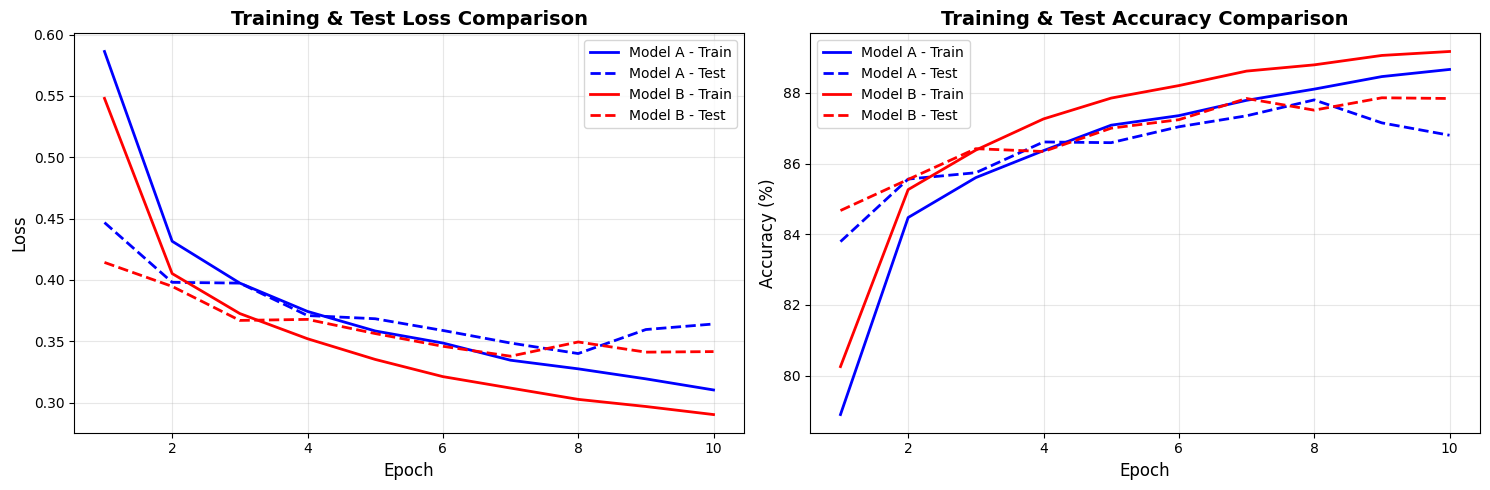


💡 What to look for:
   - Loss should decrease over epochs (model is learning)
   - Accuracy should increase over epochs
   - Test accuracy close to train accuracy = good generalization
   - Big gap between train and test = overfitting


In [30]:
# VISUALIZE TRAINING PROGRESS

# Create a figure with 2 subplots (loss and accuracy)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Loss over epochs
ax1.plot(range(1, num_epochs+1), train_losses_A, 'b-', label='Model A - Train', linewidth=2)
ax1.plot(range(1, num_epochs+1), test_losses_A, 'b--', label='Model A - Test', linewidth=2)
ax1.plot(range(1, num_epochs+1), train_losses_B, 'r-', label='Model B - Train', linewidth=2)
ax1.plot(range(1, num_epochs+1), test_losses_B, 'r--', label='Model B - Test', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('Training & Test Loss Comparison', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Accuracy over epochs
ax2.plot(range(1, num_epochs+1), train_accuracies_A, 'b-', label='Model A - Train', linewidth=2)
ax2.plot(range(1, num_epochs+1), test_accuracies_A, 'b--', label='Model A - Test', linewidth=2)
ax2.plot(range(1, num_epochs+1), train_accuracies_B, 'r-', label='Model B - Train', linewidth=2)
ax2.plot(range(1, num_epochs+1), test_accuracies_B, 'r--', label='Model B - Test', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Accuracy (%)', fontsize=12)
ax2.set_title('Training & Test Accuracy Comparison', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 What to look for:")
print("   - Loss should decrease over epochs (model is learning)")
print("   - Accuracy should increase over epochs")
print("   - Test accuracy close to train accuracy = good generalization")
print("   - Big gap between train and test = overfitting")